In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


# Visualizations Libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches




from matplotlib.pyplot import figure
df = pd.read_csv('fpt.csv')
vic = pd.read_csv('VIC Historical Data.csv')
df3 = df.copy();df3.to_csv('preprocessed.csv') 

c:\Users\kingc\miniconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\kingc\miniconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\kingc\miniconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
del df['Date']
del df['Vol.']
del df['Change %']
del df['Open']
del df['High']
del df['Low']
df['Price'] = df['Price'].str[:-3]
df

,Price
0,"76,900"
1,"76,200"
2,"76,700"
3,"76,500"
4,"76,400"
...,...
2240,"9,161"
2241,"9,103"
2242,"9,199"
2243,"9,065"


In [3]:
del vic['Date']
del vic['Vol.']
del vic['Change %']
del vic['Open']
del vic['High']
del vic['Low']
#vic['Price'] = vic['Price'].str[:-3]
vic

,Price
0,"52,800"
1,"52,800"
2,"52,800"
3,"52,800"
4,"53,200"
5,"53,300"
6,"54,000"
7,"53,000"
8,"53,300"
9,"53,100"


In [4]:
df['Price'] = df['Price'].replace({'\$':'',',':''}, regex = True)
df['Price'] = df['Price'].astype(str).astype(int)

In [5]:
vic['Price'] = vic['Price'].replace({'\$':'',',':''}, regex = True)
vic['Price'] = vic['Price'].astype(str).astype(int)

In [6]:
vic

,Price
0,52800
1,52800
2,52800
3,52800
4,53200
5,53300
6,54000
7,53000
8,53300
9,53100


In [7]:
df2 = df.copy()
df2 = df2.iloc[::-1].reset_index()
df2['Index']=df2.index
df2 = df2[['Index','Price']]
df2

,Index,Price
0,0,9084
1,1,9065
2,2,9199
3,3,9103
4,4,9161
...,...,...
2240,2240,76400
2241,2241,76500
2242,2242,76700
2243,2243,76200


Text(0, 0.5, 'The price of FPT stock')

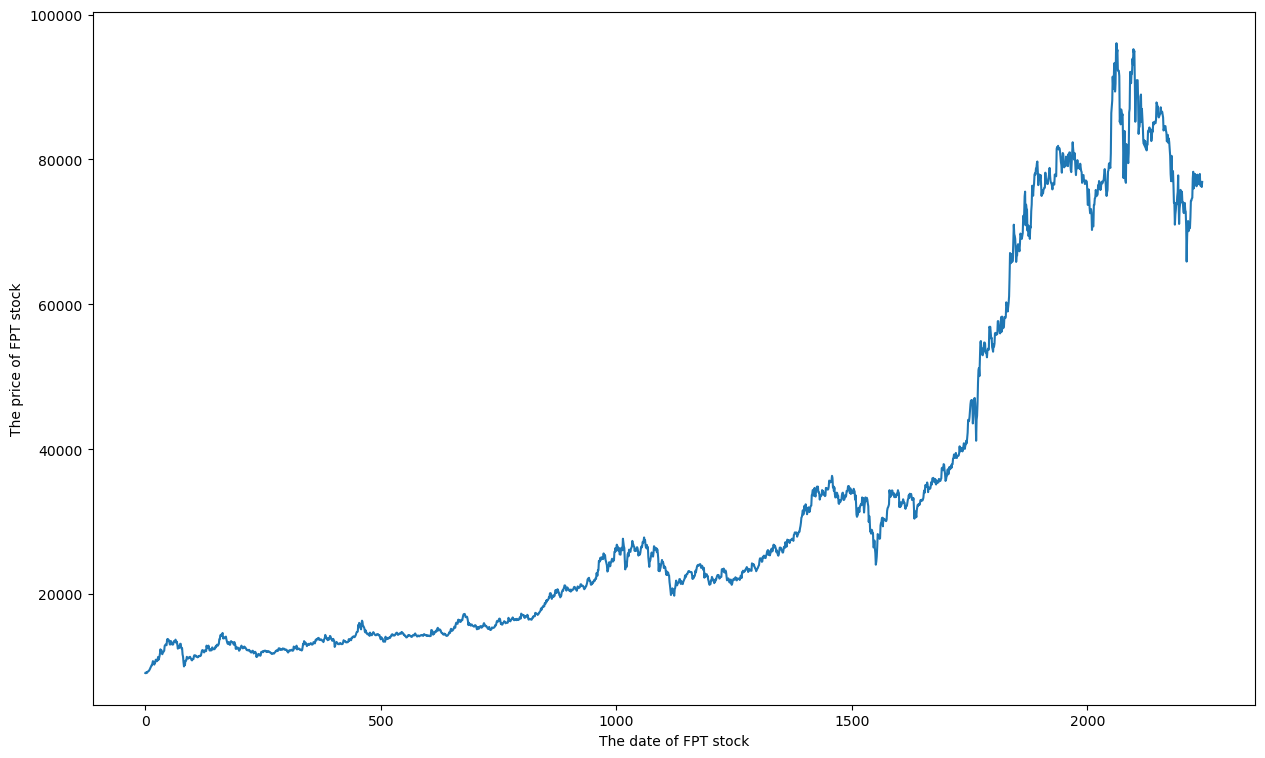

In [8]:
df2['Price'].plot(figsize=(15,9))
plt.xlabel('The date of FPT stock')
plt.ylabel('The price of FPT stock')

In [9]:

sc = MinMaxScaler(feature_range=(0,1))
training_scaled=sc.fit_transform(df2['Price'].values.reshape(-1,1))

x_train = []
y_train = []
prediction_day = 60
for iter in range(prediction_day,len(training_scaled)):
    x_train.append(training_scaled[iter-prediction_day:iter,0])
    y_train.append(training_scaled[iter,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

def LSTM_model():
    model = Sequential()
    model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)));model.add(Dropout(.2))
    model.add(LSTM(units=50,return_sequences=True));model.add(Dropout(.2))
    model.add(LSTM(units=50,return_sequences=True));model.add(Dropout(.2))
    model.add(LSTM(units=50));model.add(Dropout(.2))
    model.add(Dense(units=1))
    return model


In [10]:
model = LSTM_model()
model.compile(optimizer='adam',loss='mean_absolute_percentage_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)


Epoch 1/25
69/69 [==============================] - 15s 83ms/step - loss: 18.0043
Epoch 2/25
69/69 [==============================] - 6s 81ms/step - loss: 12.4488
Epoch 3/25
69/69 [==============================] - 6s 82ms/step - loss: 11.9369
Epoch 4/25
69/69 [==============================] - 6s 84ms/step - loss: 11.1619
Epoch 5/25
69/69 [==============================] - 7s 98ms/step - loss: 10.9791
Epoch 6/25
69/69 [==============================] - 6s 91ms/step - loss: 10.4209
Epoch 7/25
69/69 [==============================] - 6s 85ms/step - loss: 9.7917
Epoch 8/25
69/69 [==============================] - 6s 84ms/step - loss: 9.3999
Epoch 9/25
69/69 [==============================] - 6s 83ms/step - loss: 9.3395
Epoch 10/25
69/69 [==============================] - 6s 84ms/step - loss: 9.5822
Epoch 11/25
69/69 [==============================] - 7s 106ms/step - loss: 9.1894
Epoch 12/25
69/69 [==============================] - 7s 106ms/step - loss: 9.6433
Epoch 13/25
69/69 [=========

In [11]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
69/69 [==============================] - 7s 99ms/step - loss: 7.7891
Epoch 2/10
69/69 [==============================] - 6s 91ms/step - loss: 7.5013
Epoch 3/10
69/69 [==============================] - 7s 105ms/step - loss: 7.5323
Epoch 4/10
69/69 [==============================] - 7s 104ms/step - loss: 8.3324
Epoch 5/10
69/69 [==============================] - 6s 93ms/step - loss: 7.2139
Epoch 6/10
69/69 [==============================] - 7s 98ms/step - loss: 7.3351
Epoch 7/10
69/69 [==============================] - 6s 93ms/step - loss: 7.3292
Epoch 8/10
69/69 [==============================] - 6s 91ms/step - loss: 8.0084
Epoch 9/10
69/69 [==============================] - 7s 97ms/step - loss: 7.9108
Epoch 10/10
69/69 [==============================] - 6s 93ms/step - loss: 8.0003


In [12]:
actualprice = df2['Price'].values
modelinput = actualprice.reshape(-1,1)
modelinput=sc.transform(modelinput)

In [13]:
x_test = []
for x in range(prediction_day,len(modelinput)):
    x_test.append(modelinput[x-prediction_day:x,0])
x_test = np.array(x_test);x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
prediction = model.predict(x_test)
prediction = sc.inverse_transform(prediction)

69/69 [==============================] - 4s 32ms/step


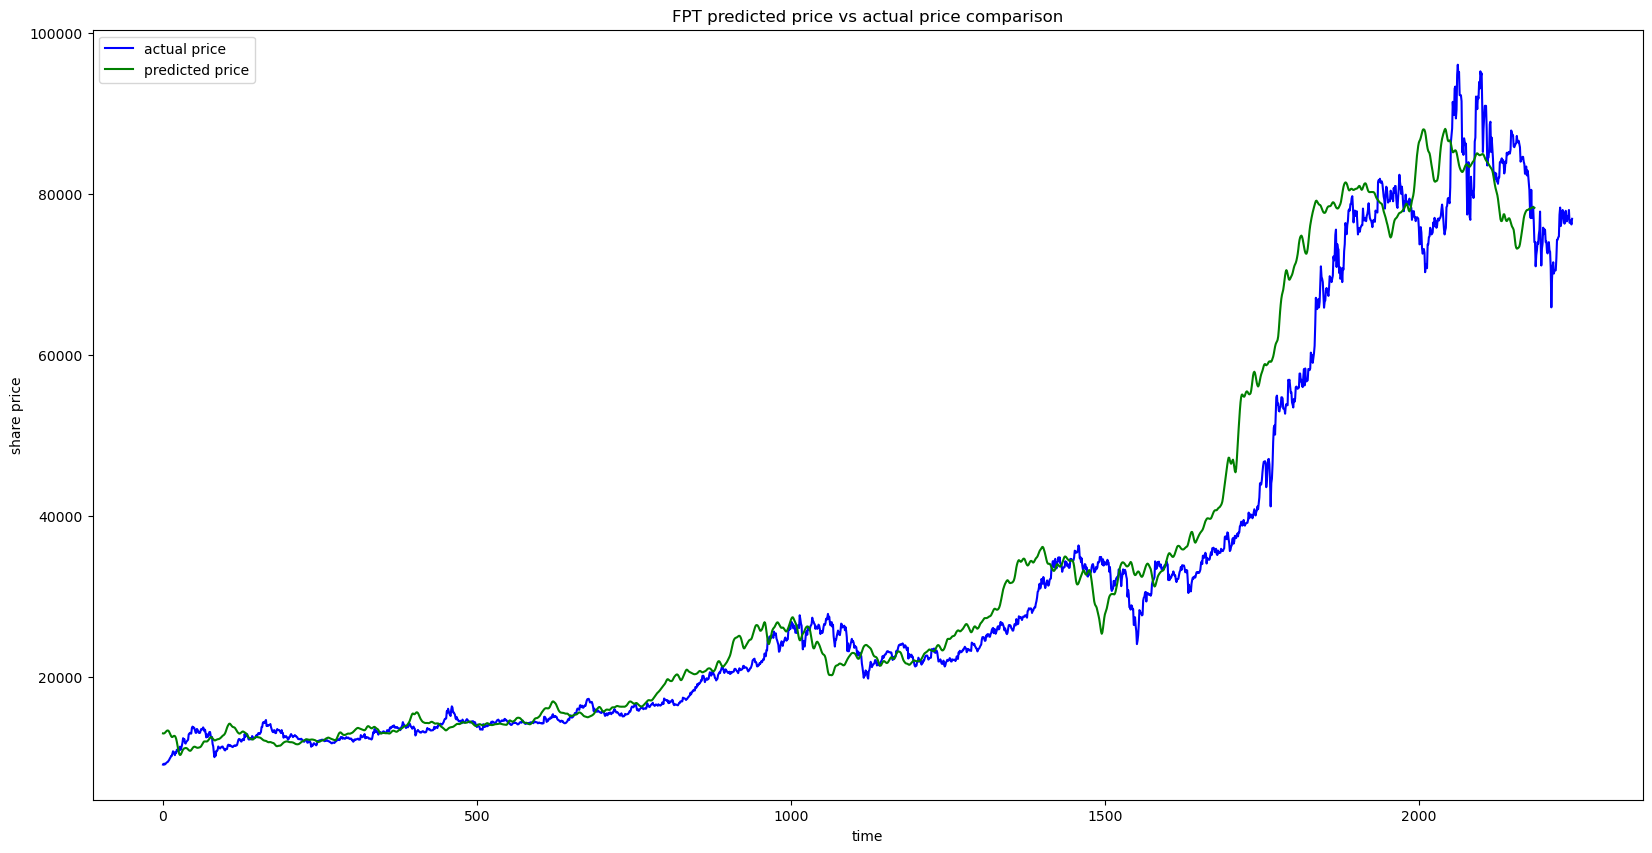

In [14]:
plt.figure(figsize=(20,10))
plt.plot(actualprice,color='blue',label='actual price')
plt.plot(prediction,color='green',label='predicted price')
plt.title('FPT predicted price vs actual price comparison')
plt.xlabel('time');plt.ylabel('share price')
plt.legend()



In [15]:
from sklearn.metrics import mean_squared_error
def mse(predictions, targets):
    return ((predictions - targets) ** 2).mean()
print('mse is' ,mse(actualprice,prediction))
print('rmse is', np.sqrt(mse(actualprice,prediction)) )

mse is 1156235900.0761569
rmse is 34003.46894180294
